# Notebook for visualizing results from quiz no. 9 ("emotional learning and PTSD") and general trends
## Intro to Neuroscience Spring 2020

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Create pandas dataframe with column names for quiz data

In [21]:
file = '/Users/maltegueth/Documents/raw_quiz_scores.csv'

columns = ['student', 'percent', 'score', 'corrects', 'blanks', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'quiz']
data = pd.read_csv(file, sep=',', names=columns)

# Here are some basic stats from the dataframe (mean, median, sd)
## Note that the midterm in counted here as quiz 6. Therefore, emotional learning and PTSD is now no. 10 in the dataframe.

In [23]:
data[data['quiz'] == 10].percent.mean()

95.13157894736842

In [24]:
data[data['quiz'] == 10].percent.median()

100.0

In [25]:
data[data['quiz'] == 10].percent.std()

10.93264650492766

# Next, check some distributional plots to visualize how the class as a whole scored

In [26]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

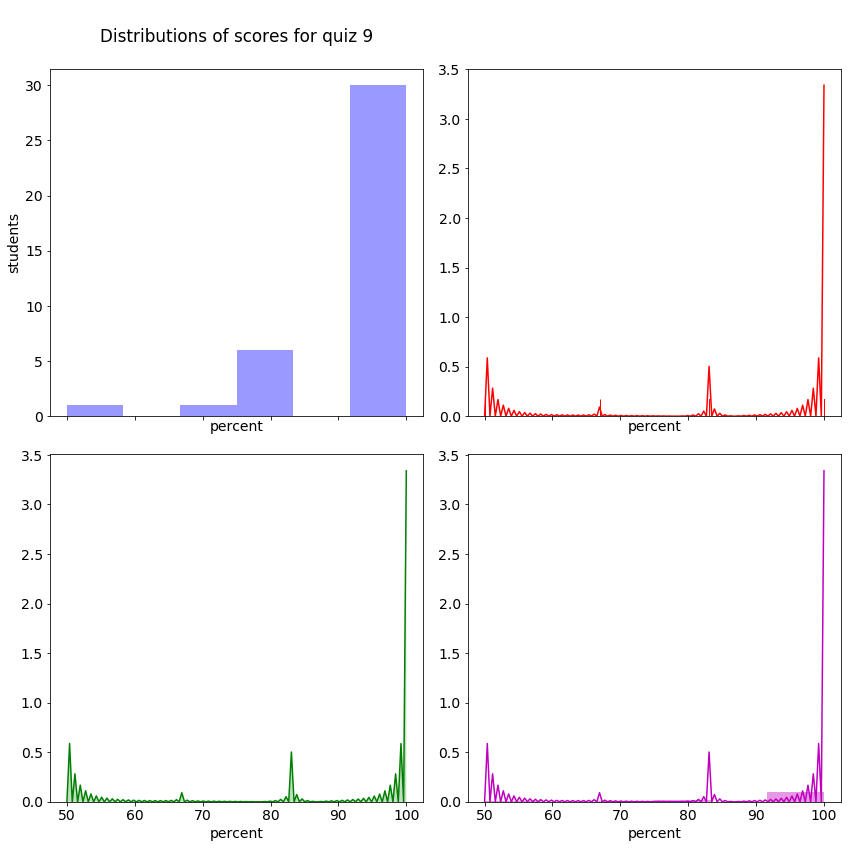

In [33]:
fig1, axes = matplotlib.pyplot.subplots(2, 2, figsize=(12, 12), sharex=True)

ax = sns.distplot(data[data['quiz'] == 10]['percent'], kde=False, color="b", ax=axes[0,0])
sns.distplot(data[data['quiz'] == 10]['percent'], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(data[data['quiz'] == 10]['percent'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data[data['quiz'] == 10]['percent'], color="m", ax=axes[1, 1])

ax.set(ylabel='students')
ax.set(title='\nDistributions of scores for quiz 9\n')
matplotlib.pyplot.tight_layout()

In [28]:
items = '/Users/maltegueth/Downloads/items_elPTSD.csv'

cols = ['question', 'incorrect','nrIncor']
itemsData = pd.read_csv(items, sep=';', names=cols)
itemsData['incorrect'] = itemsData['incorrect']*100

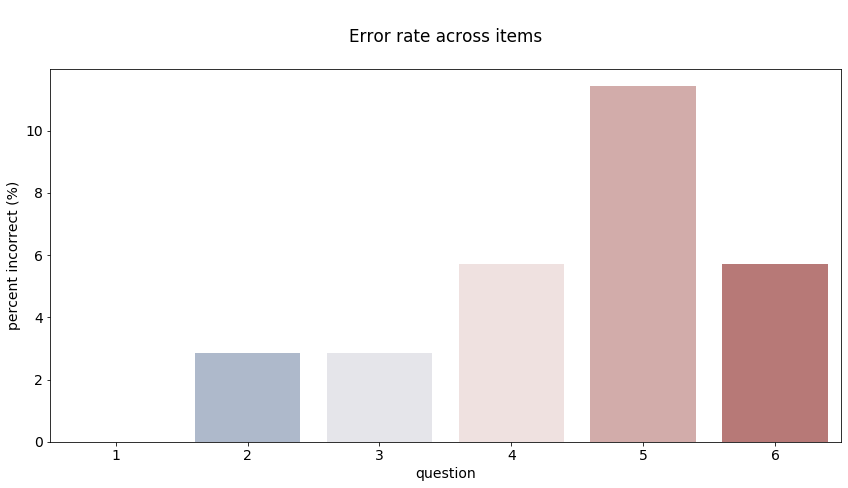

In [29]:
fig2, ax1 = plt.subplots(figsize=(12, 7), sharex=True)

sns.barplot(x='question', y='incorrect', data=itemsData, ax=ax1, palette="vlag")

ax1.set(ylabel='percent incorrect (%)')
ax1.set(title='\nError rate across items\n')
matplotlib.pyplot.tight_layout()

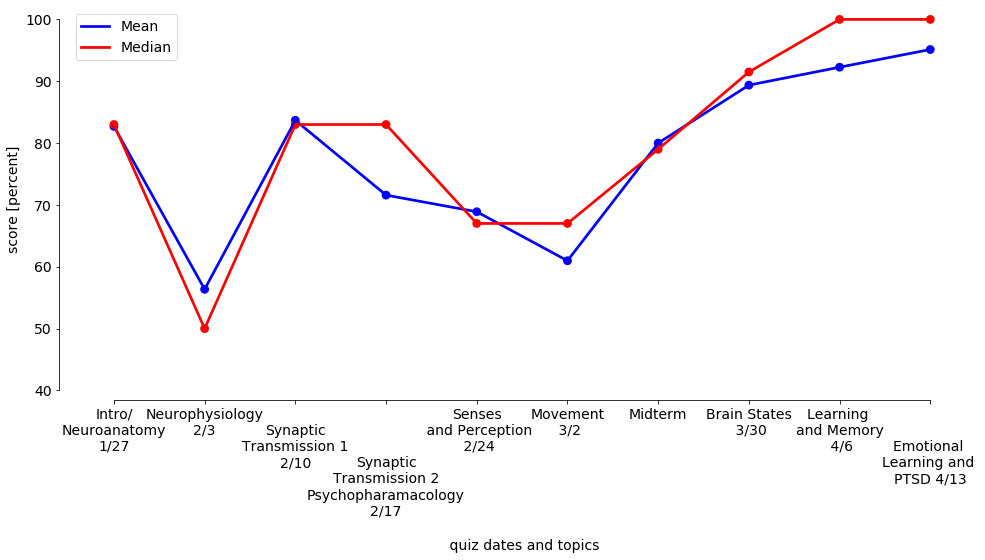

In [32]:
fig3 = matplotlib.pyplot.figure(figsize=(14, 8))

ax = sns.pointplot(x="quiz", y="percent", ci=None, estimator=np.mean, data=data, color='b')
sns.pointplot(x="quiz", y="percent",  ci=None, estimator=np.median, data=data, ax=ax, color='r')

ax.set(ylabel='score [percent]')
ax.set(ylim=[40, 102])

ax.set(xlabel="\n quiz dates and topics")
ax.set(xticklabels=['Intro/\nNeuroanatomy\n1/27', 'Neurophysiology\n2/3', 
                    '\nSynaptic\nTransmission 1\n2/10', '\n\n\nSynaptic\nTransmission 2\nPsychopharamacology\n2/17',
                   'Senses\n and Perception\n 2/24', 'Movement\n 3/2', 'Midterm', 'Brain States\n 3/30',
                    'Learning \nand Memory\n 4/6', '\n\nEmotional \nLearning and \nPTSD 4/13'])

ax.legend(['Mean', 'Median'])

sns.despine(offset=10, trim=True)
matplotlib.pyplot.tight_layout()